In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [96]:
data = pd.read_csv('data/bm.csv').to_numpy()

In [97]:
random_state = np.random.randint(1, 1001)
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.1, random_state=random_state)

In [98]:
# this refers to indices of X_train, the r here is filled with random indices of a pair of x and y values
from sklearn.tree import DecisionTreeClassifier
from numpy.random import default_rng
from sklearn.metrics import accuracy_score
rng = default_rng()

n = 5000
r = np.zeros([n, 100], dtype=int)
XX = np.zeros([n, 2, 100])

# boostrap sampling
for i in range (100):
    r[:, i] = rng.choice(n, size=n, replace=True)
    XX[:, :, i] = X_train[r[:, i], :]

In [99]:
# training the trees with a big max_depth, so that they over fit and that I can use the pruning method.
trees = []
for i in range (100):
    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train[r[:, i]], y_train[r[:, i]])
    trees.append(clf_tree)

note: classification error should only be used for performance, not for training.
note: probably the best way to decide on the max_depth to use gini impurity measures and see after how many depth levels the change starts being insignificant. That's the place to stop

In [100]:
predictions = np.zeros([X_test.shape[0], 100], dtype=int)
pred_list = []
for i in range(len(trees)):
    prediction = trees[i].predict(X_test)
    predictions[:, i] = prediction
    pred_list.append(prediction)

In [101]:
accuracies=[]
for pred in pred_list:
    accuracies.append(np. sum(y_test == pred) / len(y_test))

In [102]:
# implement majoirty vote prediction along axis 1
random_forest_predictions = []
for row in predictions:
    unique_elements, counts = np.unique(row, return_counts=True)
    majority_vote = unique_elements[np.argmax(counts)]
    random_forest_predictions.append(majority_vote)

random_forest_predictions = np.array(random_forest_predictions)
random_forest_accuracy = np.sum(y_test == random_forest_predictions) / len(y_test)

In [103]:
generalization_error_forest = 1 - random_forest_accuracy

In [105]:
avg_acc = np.mean(accuracies)
generalization_error_trees = 1 - avg_acc

c) A plot of the decision boundaries of all the models, and including the ensemble model (c.f Figure 3).
- Plotting the decision boundaries for the trees first.

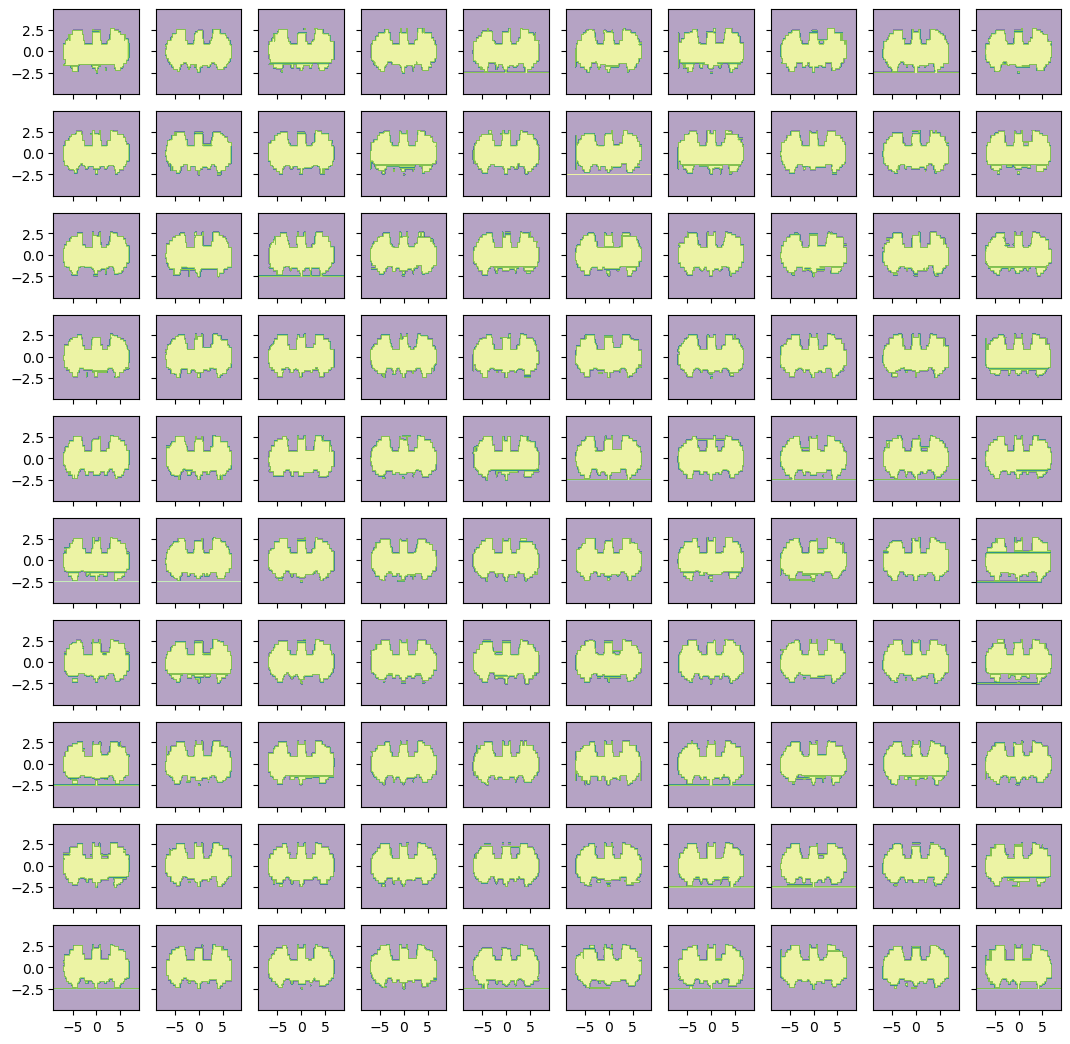

In [139]:
import matplotlib.pyplot as plt
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


f, axes = plt.subplots(10, 10, sharex='col', sharey='row', figsize=(13, 13))
# plot 99 trees in 10x10 grid and a forest as the last one, in the bottom right corner
Z_list_for_trees = []
for i, tree in enumerate(trees):
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z_list_for_trees.append(Z)
    axes[i//10, i%10].contourf(xx, yy, Z, alpha=0.4)

- Plotting the decision boundary of the forest.


In [134]:
majority_votes = []

for row in range(Z_list_for_trees[0].shape[0]):
    row_votes = []
    for col in range(Z_list_for_trees[0].shape[1]):
        one_count = 0
        zero_count = 0
        for arr in Z_list_for_trees:
            if arr[row, col] == 1:
                one_count += 1
            else:
                zero_count += 1
        if one_count >= len(Z_list_for_trees) / 2:
            majority_vote = 1
        else:
            majority_vote = 0
        row_votes.append(majority_vote)
    majority_votes.append(row_votes)
majority_votes = np.array(majority_votes)

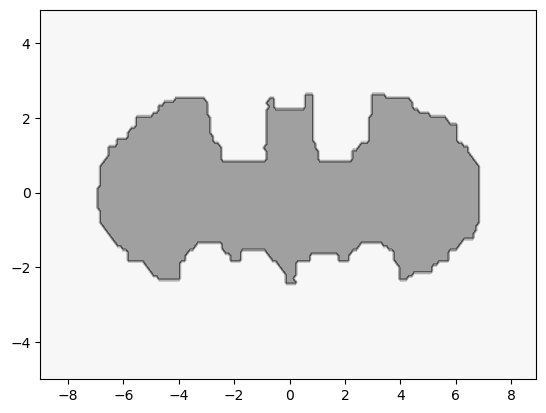

In [138]:
plt.contourf(xx, yy, majority_votes.reshape(xx.shape),cmap= 'binary' , alpha=0.4)